In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [6]:
type(data)

dict

In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9528,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906569e+07,1.906569e+07,NaN,1,NaN,NaN,2022-06-12T19:30:00.000Z,27634.100049,3.134248e+10,16.8324,-1.270487,-3.596302,-7.786185,-8.131577,-33.103747,-28.691182,5.268631e+11,47.2573,5.803161e+11,2022-06-12T19:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 19:30:58.256376
1,1027,Ethereum,ETH,ethereum,5745,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211473e+08,1.211473e+08,NaN,2,NaN,NaN,2022-06-12T19:29:00.000Z,1490.582465,2.269423e+10,8.5792,-1.682111,-4.079025,-17.896461,-27.987169,-51.976457,-41.166865,1.805800e+11,16.1972,1.805800e+11,2022-06-12T19:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 19:30:58.256376
2,825,Tether,USDT,tether,34602,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.249498e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-12T19:29:00.000Z,0.998953,5.523626e+10,15.0326,-0.012605,-0.008767,-0.034562,0.030537,-0.127428,-0.133154,7.241909e+10,6.4957,7.962718e+10,2022-06-12T19:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-12 19:30:58.256376
3,3408,USD Coin,USDC,usd-coin,4383,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.396875e+10,5.396875e+10,NaN,4,NaN,NaN,2022-06-12T19:29:00.000Z,0.999942,5.789885e+09,22.3030,-0.058801,-0.018076,-0.041344,-0.063007,0.022397,0.001089,5.396564e+10,4.8405,5.396564e+10,2022-06-12T19:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-12 19:30:58.256376
4,1839,BNB,BNB,bnb,947,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-12T19:29:00.000Z,263.044241,1.335264e+09,9.6722,-1.101035,-3.481775,-12.416361,-11.320354,-37.605464,-28.068718,4.294907e+10,3.8523,4.343301e+10,2022-06-12T19:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 19:30:58.256376
5,4687,Binance USD,BUSD,binance-usd,3834,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.790706e+10,1.790706e+10,NaN,6,NaN,NaN,2022-06-12T19:29:00.000Z,1.001491,5.413441e+09,23.3150,0.157330,0.012138,0.107559,0.130830,0.062827,0.175985,1.793376e+10,1.6086,1.793376e+10,2022-06-12T19:29:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-12 19:30:58.256376
6,2010,Cardano,ADA,cardano,455,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,7,NaN,NaN,2022-06-12T19:29:00.000Z,0.519797,1.474602e+09,21.1753,-1.363919,-8.542758,-9.336427,-5.806440,-46.347462,-34.179406,1.763881e+10,1.5821,2.339086e+10,2022-06-12T19:29:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-12 19:30:58.256376
7,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,8,NaN,NaN,2022-06-12T19:30:00.000Z,0.357879,1.330170e+09,22.9021,-0.948256,-2.342534,-10.172591,-16.277430,-50.407783,-52.996896,1.730096e+10,1.5518,3.578785e+10,2022-06-12T19:30:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-12 19:30:58.256376
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.420769e+08,5.116169e+08,NaN,9,NaN,NaN,2022-06

In [16]:
def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    

#     df = pd.json_normalize(data['data'])
#     df['timestamp'] = pd.to_datetime('now')
#     df= df.append(df)
    
#     if not os.path.isfile(r'C:\Users\monik\Documents\API Project Scripts\API.csv'):
#         df.to_csv(r'C:\Users\monik\Documents\API Project Scripts\API.csv',header='column_names')
#     else:
#         df.to_csv(r'C:\Users\monik\Documents\API Project Scripts\API.csv',mode='a',header=False)
     
    
    

In [14]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) 
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [17]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9528,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906569e+07,1.906569e+07,NaN,1,NaN,NaN,2022-06-12T19:58:00.000Z,27502.001488,3.166280e+10,18.9573,-1.544929,-3.879273,-8.484883,-8.415053,-33.080466,-29.114122,5.243446e+11,47.2077,5.775420e+11,2022-06-12T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 19:58:30.754107
1,1027,Ethereum,ETH,ethereum,5745,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211473e+08,1.211473e+08,NaN,2,NaN,NaN,2022-06-12T19:57:00.000Z,1486.398926,2.284308e+10,9.7713,-1.816026,-4.031953,-18.353796,-27.790821,-51.878552,-41.378464,1.800731e+11,16.2123,1.800731e+11,2022-06-12T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 19:58:30.754107
2,825,Tether,USDT,tether,34603,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.249498e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-12T19:57:00.000Z,0.999053,5.575834e+10,16.6523,0.010954,-0.003305,-0.027730,0.068592,-0.113734,-0.113707,7.242632e+10,6.5207,7.963513e+10,2022-06-12T19:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-12 19:58:30.754107
3,3408,USD Coin,USDC,usd-coin,4383,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.396875e+10,5.396875e+10,NaN,4,NaN,NaN,2022-06-12T19:57:00.000Z,1.000091,5.848960e+09,22.8681,0.014907,-0.014551,-0.016802,-0.005948,0.044121,0.015341,5.397368e+10,4.8593,5.397368e+10,2022-06-12T19:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-12 19:58:30.754107
4,1839,BNB,BNB,bnb,947,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-12T19:57:00.000Z,262.690295,1.339479e+09,10.7293,-0.900809,-3.425101,-12.808919,-11.035855,-37.415763,-28.169655,4.289128e+10,3.8616,4.337457e+10,2022-06-12T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 19:58:30.754107
5,4687,Binance USD,BUSD,binance-usd,3834,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.790706e+10,1.790706e+10,NaN,6,NaN,NaN,2022-06-12T19:58:00.000Z,0.999482,5.455970e+09,24.7905,-0.026730,-0.189831,-0.196952,-0.160135,0.063335,-0.000113,1.789779e+10,1.6114,1.789779e+10,2022-06-12T19:58:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-12 19:58:30.754107
6,2010,Cardano,ADA,cardano,455,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,7,NaN,NaN,2022-06-12T19:57:00.000Z,0.519284,1.476052e+09,21.9382,-1.217264,-7.306639,-9.641751,-5.483546,-46.204441,-34.504643,1.762140e+10,1.5865,2.336776e+10,2022-06-12T19:57:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-12 19:58:30.754107
7,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,8,NaN,NaN,2022-06-12T19:58:00.000Z,0.354037,1.349167e+09,24.9144,-1.879888,-3.405559,-11.257611,-16.729462,-50.748943,-53.494840,1.711526e+10,1.5409,3.540372e+10,2022-06-12T19:58:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-12 19:58:30.754107
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.420769e+08,5.116169e+08,NaN,9,NaN,NaN,202

In [18]:
# df_csv = pd.read_csv(r'C:\Users\monik\Documents\API Project Scripts\API.csv')
# df_csv

In [19]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9528,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19065687.00000,19065687.00000,NaN,1,NaN,NaN,2022-06-12T19:58:00.000Z,27502.00149,31662803613.94880,18.95730,-1.54493,-3.87927,-8.48488,-8.41505,-33.08047,-29.11412,524344552243.45276,47.20770,577542031247.68005,2022-06-12T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 19:58:30.754107
1,1027,Ethereum,ETH,ethereum,5745,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121147251.49900,121147251.49900,NaN,2,NaN,NaN,2022-06-12T19:57:00.000Z,1486.39893,22843076553.22212,9.77130,-1.81603,-4.03195,-18.35380,-27.79082,-51.87855,-41.37846,180073144574.65335,16.21230,180073144574.64999,2022-06-12T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 19:58:30.754107
2,825,Tether,USDT,tether,34603,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,72494981446.97955,79710622658.24379,NaN,3,NaN,NaN,2022-06-12T19:57:00.000Z,0.99905,55758343021.79230,16.65230,0.01095,-0.00330,-0.02773,0.06859,-0.11373,-0.11371,72426324440.82034,6.52070,79635132015.97000,2022-06-12T19:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-12 19:58:30.754107
3,3408,USD Coin,USDC,usd-coin,4383,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,53968750304.94484,53968750304.94484,NaN,4,NaN,NaN,2022-06-12T19:57:00.000Z,1.00009,5848959693.00348,22.86810,0.01491,-0.01455,-0.01680,-0.00595,0.04412,0.01534,53973678133.02306,4.85930,53973678133.02000,2022-06-12T19:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-12 19:58:30.754107
4,1839,BNB,BNB,bnb,947,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-12T19:57:00.000Z,262.69030,1339478763.91050,10.72930,-0.90081,-3.42510,-12.80892,-11.03585,-37.41576,-28.16966,42891276664.88539,3.86160,43374570426.83000,2022-06-12T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 19:58:30.754107
5,4687,Binance USD,BUSD,binance-usd,3834,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17907058466.47926,17907058466.47926,NaN,6,NaN,NaN,2022-06-12T19:58:00.000Z,0.99948,5455969964.11393,24.79050,-0.02673,-0.18983,-0.19695,-0.16014,0.06334,-0.00011,17897787898.15264,1.61140,17897787898.15000,2022-06-12T19:58:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-06-12 19:58:30.754107
6,2010,Cardano,ADA,cardano,455,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33934048405.59300,34277702081.60500,NaN,7,NaN,NaN,2022-06-12T19:57:00.000Z,0.51928,1476051633.37669,21.93820,-1.21726,-7.30664,-9.64175,-5.48355,-46.20444,-34.50464,17621396838.27858,1.58650,23367764678.26000,2022-06-12T19:57:00.000Z,1839.00000,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-12 19:58:30.754107
7,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,8,NaN,NaN,2022-06-12T19:58:00.000Z,0.35404,1349166740.73381,24.91440,-1.87989,-3.40556,-11.25761,-16.72946,-50.74894,-53.49484,17115256036.92896,1.54090,35403719689.36000,2022-06-12T19:58:00.000Z,1839.00000,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe

In [20]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.54493,-3.87927,-8.48488,-8.41505,-33.08047,-29.11412
Ethereum,-1.81603,-4.03195,-18.35380,-27.79082,-51.87855,-41.37846
Tether,0.01095,-0.00330,-0.02773,0.06859,-0.11373,-0.11371
USD Coin,0.01491,-0.01455,-0.01680,-0.00595,0.04412,0.01534
BNB,-0.90081,-3.42510,-12.80892,-11.03585,-37.41576,-28.16966
Binance USD,-0.02673,-0.18983,-0.19695,-0.16014,0.06334,-0.00011
Cardano,-1.21726,-7.30664,-9.64175,-5.48355,-46.20444,-34.50464
XRP,-1.87989,-3.40556,-11.25761,-16.72946,-50.74894,-53.49484
Solana,-0.76621,-4.85981,-17.53113,-36.21666,-68.65952,-59.05890


In [21]:
df4 = df3.stack()
df4


name                                      
Bitcoin       quote.USD.percent_change_1h     -1.54493
              quote.USD.percent_change_24h    -3.87927
              quote.USD.percent_change_7d     -8.48488
              quote.USD.percent_change_30d    -8.41505
              quote.USD.percent_change_60d   -33.08047
                                                ...   
UNUS SED LEO  quote.USD.percent_change_24h    -0.07495
              quote.USD.percent_change_7d      8.71029
              quote.USD.percent_change_30d     8.07292
              quote.USD.percent_change_60d    -3.45850
              quote.USD.percent_change_90d    -5.71591
Length: 90, dtype: float64

In [22]:
type(df4)

pandas.core.series.Series

In [23]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -1.54493
             quote.USD.percent_change_24h  -3.87927
             quote.USD.percent_change_7d   -8.48488
             quote.USD.percent_change_30d  -8.41505
             quote.USD.percent_change_60d -33.08047
...                                             ...
UNUS SED LEO quote.USD.percent_change_24h  -0.07495
             quote.USD.percent_change_7d    8.71029
             quote.USD.percent_change_30d   8.07292
             quote.USD.percent_change_60d  -3.45850
             quote.USD.percent_change_90d  -5.71591

[90 rows x 1 columns]

In [27]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-1.54493
1,Bitcoin,quote.USD.percent_change_24h,-3.87927
2,Bitcoin,quote.USD.percent_change_7d,-8.48488
3,Bitcoin,quote.USD.percent_change_30d,-8.41505
4,Bitcoin,quote.USD.percent_change_60d,-33.08047
...,...,...,...
85,UNUS SED LEO,quote.USD.percent_change_24h,-0.07495
86,UNUS SED LEO,quote.USD.percent_change_7d,8.71029
87,UNUS SED LEO,quote.USD.percent_change_30d,8.07292
88,UNUS SED LEO,quote.USD.percent_change_60d,-3.45850


In [28]:
df7 = df6.rename(columns={'level_1': 'percent_change'})


In [29]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.54493
1,Bitcoin,24h,-3.87927
2,Bitcoin,7d,-8.48488
3,Bitcoin,30d,-8.41505
4,Bitcoin,60d,-33.08047
...,...,...,...
85,UNUS SED LEO,24h,-0.07495
86,UNUS SED LEO,7d,8.71029
87,UNUS SED LEO,30d,8.07292
88,UNUS SED LEO,60d,-3.45850


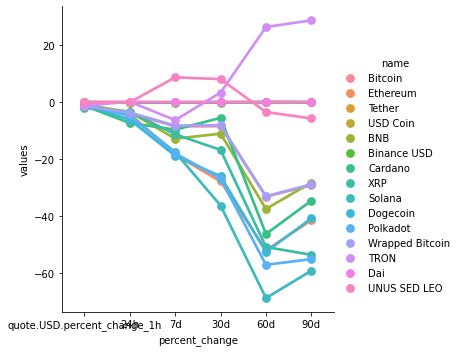

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [35]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10


,name,quote.USD.price,timestamp
0,Bitcoin,27502.00149,2022-06-12 19:58:30.754107
0,Bitcoin,27502.00149,2022-06-12 19:58:30.754107


ValueError: cannot reindex from a duplicate axis

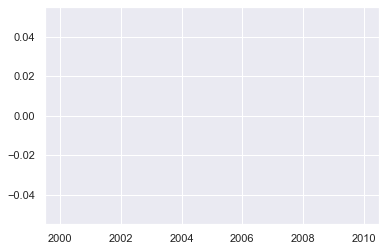

In [36]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)